# Analyze a single transmon qubit

Requirements:
* Python 3.8+
* Qiskit Metal: https://qiskit-community.github.io/qiskit-metal/
* Ansys Electronics desktop: https://www.lib.ncsu.edu/software

# Import required libs

In [19]:
import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, Headings
import pyEPR as epr


## Create the Qbit Planar design

Metal class for a planar (2D) design, consisting of a single plane chip. Typically assumed to have some CPW geometires.

In [20]:
design = designs.DesignPlanar({}, True)
design.chips.main.size['size_x'] = '2mm'
design.chips.main.size['size_y'] = '2mm'

gui = MetalGUI(design)

Create a single transmon with one readout resonator and move it to the center> This cell wil start the Qiskit Metal

In [21]:
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket

design.delete_all_components()

q1 = TransmonPocket(design, 'Q1', options = dict(
    pad_width = '425 um',
    pocket_height = '650um',
    connection_pads=dict(
        readout = dict(loc_W=+1,loc_H=+1, pad_width='200um')
    )))

gui.rebuild()
gui.autoscale()

## Finite Element Eigenmode Analysis

From an input eigenmode dataset, apply the Energy Participation Ratio analysis method.

In [22]:
from qiskit_metal.analyses.quantization import EPRanalysis

In [23]:
eig_qb = EPRanalysis(design, "hfss")

Review and update the convergence parameters and junction properties by executing following two cells.

In [24]:
eig_qb.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'min_freq_ghz': 1,
 'n_modes': 1,
 'max_delta_f': 0.5,
 'max_passes': 10,
 'min_passes': 1,
 'min_converged': 1,
 'pct_refinement': 30,
 'basis_order': 1,
 'vars': {'Lj': '10 nH', 'Cj': '0 fF'}}

Optional: Update the settings and print again.

In [7]:
# example: update single setting
eig_qb.sim.setup.max_passes = 6
eig_qb.sim.setup.vars.Lj = '11 nH'
# example: update multiple settings
eig_qb.sim.setup_update(max_delta_f = 0.4, min_freq_ghz = 1.1)

eig_qb.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'min_freq_ghz': 1.1,
 'n_modes': 1,
 'max_delta_f': 0.4,
 'max_passes': 6,
 'min_passes': 1,
 'min_converged': 1,
 'pct_refinement': 30,
 'basis_order': 1,
 'vars': {'Lj': '11 nH', 'Cj': '0 fF'}}

## Run the Analysis

Tip1: observe the frequency convergence plot. If not converging, you might want to increase the min_passes value to force the renderer to increase accuracy.

Tip2: You can use the method run() instead of sim.run() in the following cell if you want to run both eigenmode and epr analysis in a single step. If so, make sure to also tweak the setup for the epr analysis. The input parameters are otherwise the same for the two methods.

In [28]:
eig_qb.sim.run(name="Qbit", components=['Q1'], open_terminations=[], box_plus_buffer = False)
#eig_qb.run(name="Qbit", components=['Q1'], open_terminations=[], box_plus_buffer = False)

eig_qb.sim.plot_convergences()

INFO 12:39PM [connect_project]: Connecting to Ansys Desktop API...
INFO 12:39PM [load_ansys_project]: 	Opened Ansys App
INFO 12:39PM [load_ansys_project]: 	Opened Ansys Desktop v2023.1.0
INFO 12:39PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/vsilva/Documents/Ansoft/
	Project:   Project1
INFO 12:39PM [connect_design]: No active design found (or error getting active design).
INFO 12:39PM [connect]: 	 Connected to project "Project1". No design detected
INFO 12:39PM [connect_design]: 	Opened active design
	Design:    Qbit_hfss [Solution type: Eigenmode]
WARNING 12:39PM [connect_setup]: 	No design setup detected.
WARNING 12:39PM [connect_setup]: 	Creating eigenmode default setup.
INFO 12:39PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 12:39PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 12:39PM [analyze]: Analyzing setup Setup
12:40PM 08s INFO [get_f_convergence]: Saved convergences to C:\Users\vsilva\D

You can recall the information passed by either accessing the dictionary directly, or by using the print handle below.

In [9]:
# eig_qb.setup.run    <- direct access
eig_qb.sim.print_run_args()

This analysis object run with the following kwargs:
{'name': 'Qbit', 'components': ['Q1'], 'open_terminations': [], 'port_list': None, 'jj_to_port': None, 'ignored_jjs': None, 'box_plus_buffer': False}



Capture the renderer GUI

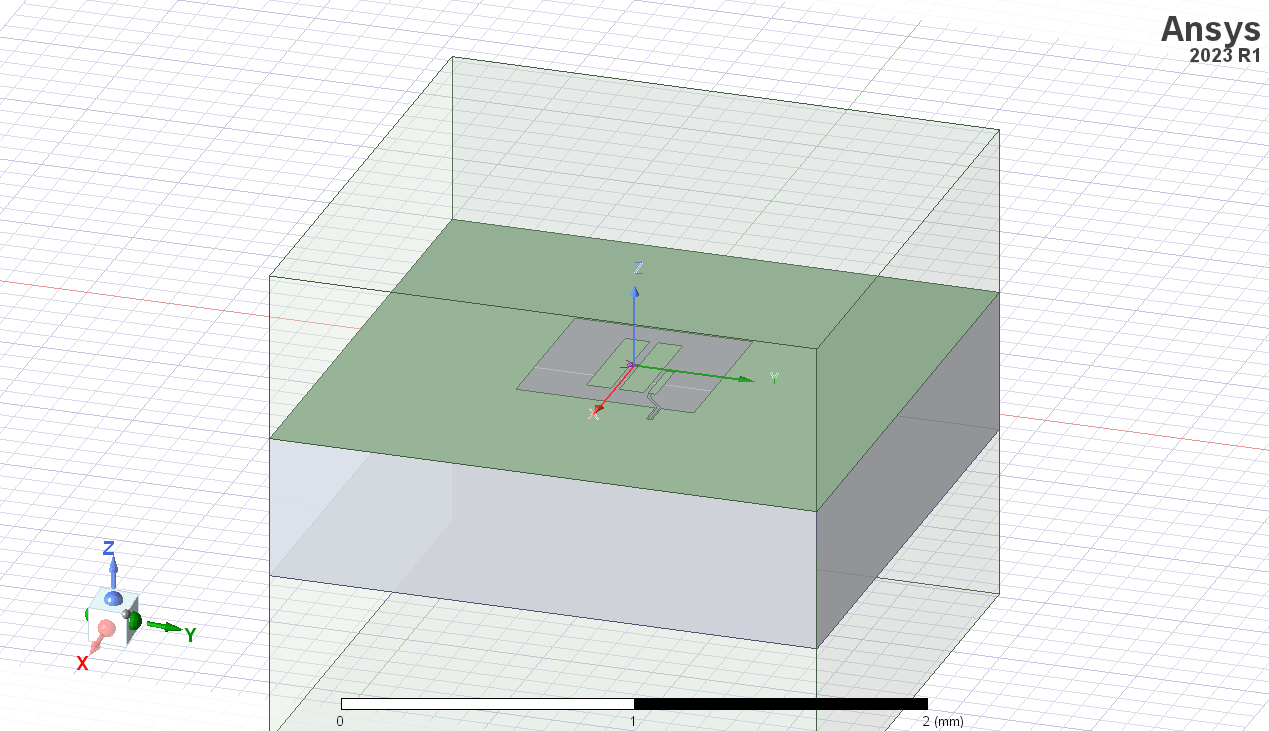

WindowsPath('C:/Users/vsilva/Documents/NCSU/etc/Hackathons/ansys.png')

In [29]:
eig_qb.sim.save_screenshot()

In [11]:
eig_qb.sim.convergence_f

,re(Mode(1)) [g]
Pass [],
1,3.131869
2,4.754418
3,5.835043
4,6.044299
5,6.162997
6,6.225912


 You can re-run the analysis after varying the parameters. Not passing the parameter components to the sim.run() method, skips the rendering and tries to run the analysis on the latest design. If a design is not found, the full metal design is rendered.

In [12]:
eig_qb.sim.setup.min_freq_ghz = 4
eig_qb.sim.run()
eig_qb.sim.convergence_f

INFO 12:36PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 12:36PM [analyze]: Analyzing setup Setup
12:36PM 39s INFO [get_f_convergence]: Saved convergences to C:\Users\vsilva\Documents\NCSU\etc\Hackathons\hfss_eig_f_convergence.csv


,re(Mode(1)) [g]
Pass [],
1,39.266822
2,5.410030
3,5.880713
4,6.065013
5,6.149758
6,6.208248


Verify that the Electro(magnetic) fields look realistic.

INFO 12:40PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


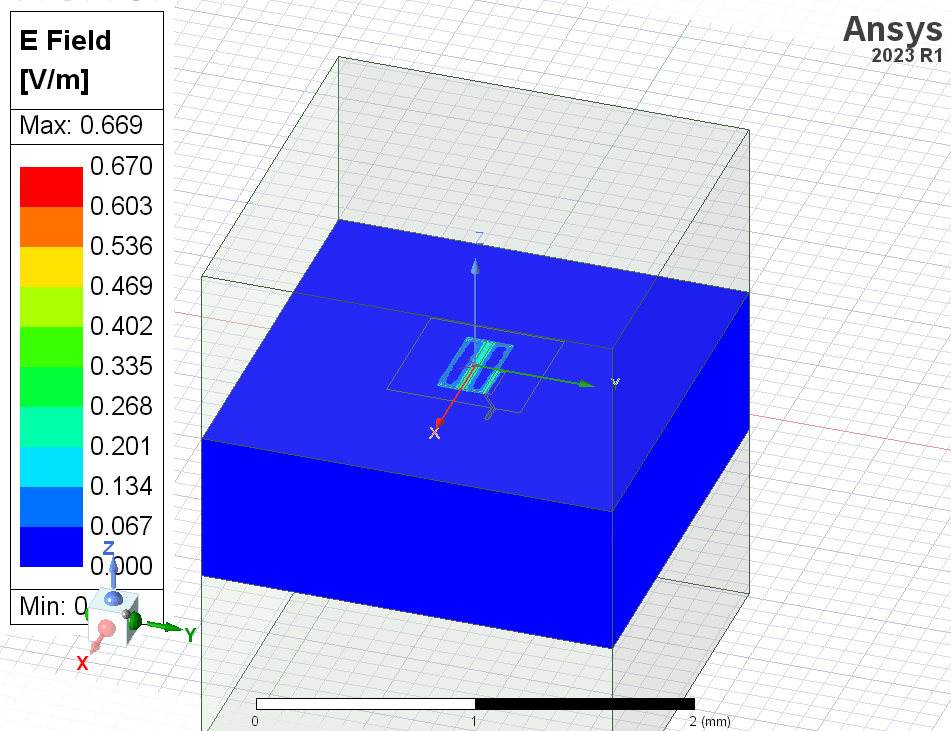

WindowsPath('C:/Users/vsilva/Documents/NCSU/etc/Hackathons/ansys.png')

In [30]:
eig_qb.sim.plot_fields('main')   # TODO:::: Ez, normal component.....decide which field typically on the qbit, or on the crossing between meanders
eig_qb.sim.save_screenshot()

## EPR Analysis

The EPR, a number between zero and one, quantifies how much of the mode energy is stored in each element. The EPRs obey universal constraints and are calculated from one electromagnetic-eigenmode simulation. They lead directly to the system quantum Hamiltonian and dissipative parameters.

For details, see https://research.ibm.com/publications/energy-participation-quantization-of-josephson-circuits

### Identify the non-linear (Josephson) junctions in the model. 

In [31]:
eig_qb.setup

{'junctions': {'jj': {'Lj_variable': 'Lj',
   'Cj_variable': 'Cj',
   'rect': 'JJ_rect_Lj_Q1_rect_jj',
   'line': 'JJ_Lj_Q1_rect_jj_'}},
 'dissipatives': {'dielectrics_bulk': ['main']},
 'cos_trunc': 8,
 'fock_trunc': 7,
 'sweep_variable': 'Lj'}

 There are missing the names of the shapes that identify the junction (rect and line). Look for those in the renderer and find the name.

In [32]:
eig_qb.setup.junctions.jj.rect = 'JJ_rect_Lj_Q1_rect_jj'
eig_qb.setup.junctions.jj.line = 'JJ_Lj_Q1_rect_jj_'
eig_qb.setup

{'junctions': {'jj': {'Lj_variable': 'Lj',
   'Cj_variable': 'Cj',
   'rect': 'JJ_rect_Lj_Q1_rect_jj',
   'line': 'JJ_Lj_Q1_rect_jj_'}},
 'dissipatives': {'dielectrics_bulk': ['main']},
 'cos_trunc': 8,
 'fock_trunc': 7,
 'sweep_variable': 'Lj'}

## Run the EPR

We will now run epr as a single step. On screen you will observe various information in this order: 
* stored energy = Electric and magnetic energy stored in the substrate and the system as a whole.
* EPR analysis results for all modes/variations.
* Spectrum analysis.
* Hamiltonian report.
  

In [33]:
eig_qb.run_epr()

#### equivalent individual calls
# s = self.setup
# self.epr_start()
# eig_qb.get_stored_energy()
# eig_qb.run_analysis()
# eig_qb.spectrum_analysis(s.cos_trunc, s.fock_trunc)
# eig_qb.report_hamiltonian(s.swp_variable)

Design "Qbit_hfss" info:
	# eigenmodes    1
	# variations    1
Design "Qbit_hfss" info:
	# eigenmodes    1
	# variations    1

        energy_elec_all       = 3.25593830063933e-24
        energy_elec_substrate = 2.99813255956674e-24
        EPR of substrate = 92.1%

        energy_mag    = 1.69908458232953e-26
        energy_mag % of energy_elec_all  = 0.5%
        

Variation 0  [1/1]

  Mode 0 at 6.33 GHz   [1/1]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.5%  1.628e-24 8.495e-27

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 96.94%
	jj              0.994224  (+)        0.0314169
		(U_tot_cap-U_tot_ind)/mean=1.57%
Calculating Qdielectric_main for mode 0 (0/0)
p_dielectric_main_0 = 0.9208198321749624


com_error: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024382), None)

## Cleanup

In [34]:
eig_qb.sim.close()


Warning! 6 COM references still alive
Ansys will likely refuse to shut down


Close metal GUI

In [35]:
gui.main_window.close()

True